Brain Tumor Detector

We have a Dataset with folders containing Brain MRI scans with a YES/NO Brain Tumor classified within Train/Test/Validation.
I am trying to see if ANN can be helped to detect / classify the MRI scans on a CPU only based Tensorflow calculation.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os
import zipfile
from PIL import Image

from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Input, Dropout, Flatten, Activation, MaxPooling2D, Conv2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam, SGD, RMSprop

In [2]:
path = 'Z:/GitHub/Datasets/BrainTumor-Dataset TTV.zip'

with zipfile.ZipFile(path, 'r') as zip_ref:
  zip_ref.extractall()

In [3]:
path

'Z:/GitHub/Datasets/BrainTumor-Dataset TTV.zip'

In [4]:
picture_size = 48
folder_path = "Z:/GitHub/Repositories/Brain-Tumor-Detection-Model/BrainTumor-Dataset TTV/"

In [5]:
batch_size = 128

datagen_train = ImageDataGenerator()
datagen_test = ImageDataGenerator()
datagen_val = ImageDataGenerator()

train_set = datagen_train.flow_from_directory(folder_path + 'train/',
                                              target_size = (picture_size, picture_size),
                                              color_mode="grayscale",
                                              batch_size = batch_size,
                                              class_mode = 'categorical',
                                              classes = ['no', 'yes'],
                                              shuffle = True)

validation_set = datagen_train.flow_from_directory(folder_path + 'validation/',
                                              target_size = (picture_size, picture_size),
                                              color_mode="grayscale",
                                              batch_size = batch_size,
                                              class_mode = 'categorical',
                                              classes = ['no', 'yes'],
                                              shuffle = True)

test_set = datagen_train.flow_from_directory(folder_path + 'test/',
                                              target_size = (picture_size, picture_size),
                                              color_mode="grayscale",
                                              batch_size = batch_size,
                                              class_mode = 'categorical',
                                              classes = ['no', 'yes'],
                                              shuffle = True)

Found 5712 images belonging to 2 classes.
Found 1311 images belonging to 2 classes.
Found 1311 images belonging to 2 classes.


In [6]:
train_set


In [7]:
ann_model = Sequential()

ann_model.add(Flatten(input_shape = (48, 48, 1)))

#Dense or Fully Connected Layers
ann_model.add(Dense(64, kernel_initializer = 'he_normal', activation = 'tanh'))
ann_model.add(Dense(128, kernel_initializer = 'he_normal', activation = 'tanh'))
ann_model.add(Dense(256, kernel_initializer = 'he_normal', activation = 'tanh'))

# Classifier
ann_model.add(Dense(2, activation = 'sigmoid'))

# Adam optimizer with 0.0001 learning rate
adam = Adam(0.0001)

# Compiling the model
ann_model.compile(loss = 'categorical_crossentropy', optimizer = adam, metrics=['accuracy'])

In [8]:
ann_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 2304)              0         
                                                                 
 dense (Dense)               (None, 64)                147520    
                                                                 
 dense_1 (Dense)             (None, 128)               8320      
                                                                 
 dense_2 (Dense)             (None, 256)               33024     
                                                                 
 dense_3 (Dense)             (None, 2)                 514       
                                                                 
Total params: 189,378
Trainable params: 189,378
Non-trainable params: 0
_________________________________________________________________


In [9]:
history1 = ann_model.fit(train_set,
                       steps_per_epoch = train_set.n//train_set.batch_size,
                       epochs = 10,
                       validation_data = validation_set
                       )

Epoch 1/10
44/44 [==============================] - 19s 411ms/step - loss: 0.5818 - accuracy: 0.7133 - val_loss: 0.5654 - val_accuracy: 0.6995
Epoch 2/10
44/44 [==============================] - 14s 317ms/step - loss: 0.5234 - accuracy: 0.7470 - val_loss: 0.5314 - val_accuracy: 0.7101
Epoch 3/10
44/44 [==============================] - 14s 317ms/step - loss: 0.4938 - accuracy: 0.7618 - val_loss: 0.4857 - val_accuracy: 0.7681
Epoch 4/10
44/44 [==============================] - 14s 317ms/step - loss: 0.4554 - accuracy: 0.7880 - val_loss: 0.4770 - val_accuracy: 0.7719
Epoch 5/10
44/44 [==============================] - 14s 322ms/step - loss: 0.4444 - accuracy: 0.8041 - val_loss: 0.4592 - val_accuracy: 0.7727
Epoch 6/10
44/44 [==============================] - 14s 312ms/step - loss: 0.4204 - accuracy: 0.8186 - val_loss: 0.4415 - val_accuracy: 0.7925
Epoch 7/10
44/44 [==============================] - 14s 310ms/step - loss: 0.4100 - accuracy: 0.8277 - val_loss: 0.4227 - val_accuracy: 0.8093

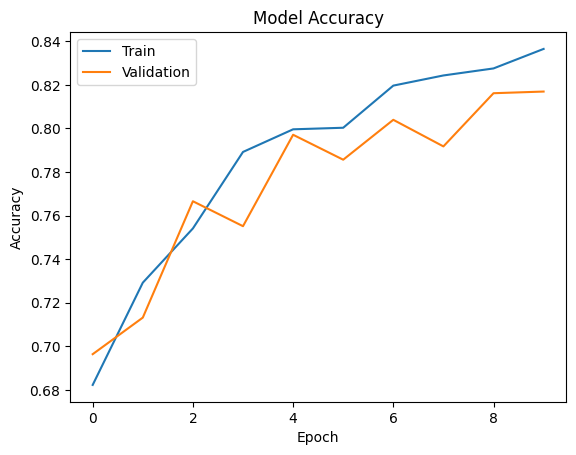

In [ ]:
plt.plot(history1.history['accuracy'])

plt.plot(history1.history['val_accuracy'])

plt.title('Model Accuracy')

plt.ylabel('Accuracy')

plt.xlabel('Epoch')

plt.legend(['Train', 'Validation'], loc = 'upper left')

plt.show()

In [ ]:
model1 = Sequential()

# First Convolutional block
model1.add(Conv2D(16, (3, 3), activation = 'relu', input_shape = (48, 48, 1)))
model1.add(MaxPooling2D(2, 2))

# Second Convolutional block
model1.add(Conv2D(32, (3, 3), activation = 'relu'))
model1.add(MaxPooling2D(2, 2))

# Flattening layer
model1.add(Flatten())

#Fully Connected layer
model1.add(Dense(128, activation = 'relu'))

# Classifier
model1.add(Dense(2, activation = 'sigmoid'))

# Adam optimizer with 0.0001 learning rate
adam = Adam(0.0001)

# Compiling the model
model1.compile(loss = "categorical_crossentropy", optimizer = adam, metrics=['accuracy'])

# Model summary
model1.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 46, 46, 16)        160       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 23, 23, 16)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 21, 21, 32)        4640      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 10, 10, 32)       0         
 2D)                                                             
                                                                 
 flatten_7 (Flatten)         (None, 3200)              0         
                                                                 
 dense_23 (Dense)            (None, 128)              

In [ ]:
history2 = model1.fit(train_set,
                      steps_per_epoch = train_set.n//train_set.batch_size,
                      epochs = 10,
                      validation_data = validation_set)

Epoch 1/10
44/44 [==============================] - 18s 404ms/step - loss: 1.6039 - accuracy: 0.7509 - val_loss: 0.7172 - val_accuracy: 0.8497
Epoch 2/10
44/44 [==============================] - 17s 393ms/step - loss: 0.4542 - accuracy: 0.8967 - val_loss: 0.5196 - val_accuracy: 0.8886
Epoch 3/10
44/44 [==============================] - 18s 401ms/step - loss: 0.3244 - accuracy: 0.9225 - val_loss: 0.4134 - val_accuracy: 0.8970
Epoch 4/10
44/44 [==============================] - 17s 387ms/step - loss: 0.2371 - accuracy: 0.9384 - val_loss: 0.4634 - val_accuracy: 0.8886
Epoch 5/10
44/44 [==============================] - 17s 384ms/step - loss: 0.2098 - accuracy: 0.9441 - val_loss: 0.3423 - val_accuracy: 0.9199
Epoch 6/10
44/44 [==============================] - 18s 400ms/step - loss: 0.1409 - accuracy: 0.9613 - val_loss: 0.2374 - val_accuracy: 0.9283
Epoch 7/10
44/44 [==============================] - 17s 398ms/step - loss: 0.1039 - accuracy: 0.9690 - val_loss: 0.1585 - val_accuracy: 0.9519

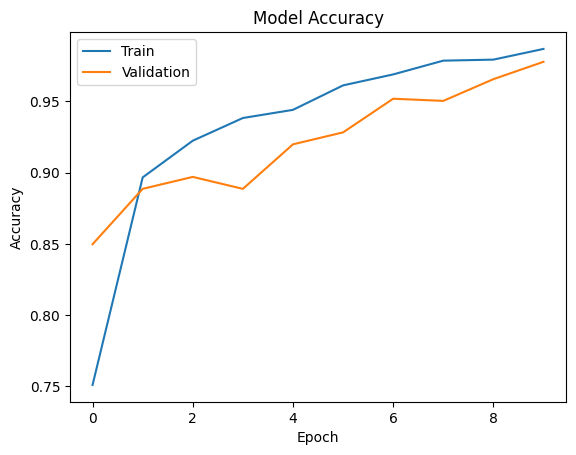

In [ ]:
plt.plot(history2.history['accuracy'])

plt.plot(history2.history['val_accuracy'])

plt.title('Model Accuracy')

plt.ylabel('Accuracy')

plt.xlabel('Epoch')

plt.legend(['Train', 'Validation'], loc = 'upper left')

plt.show()

In [89]:
model2 = Sequential()

# First CNN block
model2.add (Conv2D(64, (3, 3), padding = 'same', input_shape = (48, 48, 1)))
model2.add(Activation('relu' ))
model2.add(MaxPooling2D(pool_size = (2, 2)))

# Second CNN block
model2.add(Conv2D(128, (5, 5), padding = 'same'))
model2.add(Activation("relu"))
model2.add(MaxPooling2D(pool_size = (2, 2)))

# Third CNN block
model2.add(Conv2D(512, (5, 5), padding = 'same'))
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size = (2, 2)))

# Fourth CNN block
model2.add(Conv2D(512, (5, 5), padding = 'same'))
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size = (2, 2)))

# Flattening layer
model2.add(Flatten())

# First fully connected layer
model2.add(Dense(256))
model2.add(Activation('relu'))

# Second fully connected layer
model2.add(Dense(512))
model2.add(Activation('relu'))

# Classifier
model2.add(Dense(2, activation = 'softmax'))

# Adam optimizer with 0.0001 learning rate
opt = Adam(learning_rate = 0.0001)

# Compiling the model
model2.compile (optimizer = opt, loss = 'categorical_crossentropy', metrics=['accuracy'])

# Model summary
model2. summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 48, 48, 64)        640       
                                                                 
 activation_12 (Activation)  (None, 48, 48, 64)        0         
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 24, 24, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_15 (Conv2D)          (None, 24, 24, 128)       204928    
                                                                 
 activation_13 (Activation)  (None, 24, 24, 128)       0         
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 12, 12, 128)      0         
 g2D)                                                

In [90]:
history3 = model2.fit(train_set,
                      steps_per_epoch = train_set.n//train_set.batch_size,
                      epochs = 10,
                      validation_data = validation_set)

Epoch 1/10
44/44 [==============================] - 92s 2s/step - loss: 0.9383 - accuracy: 0.7663 - val_loss: 0.3299 - val_accuracy: 0.8558
Epoch 2/10
44/44 [==============================] - 91s 2s/step - loss: 0.1917 - accuracy: 0.9423 - val_loss: 0.1926 - val_accuracy: 0.9268
Epoch 3/10
44/44 [==============================] - 94s 2s/step - loss: 0.1210 - accuracy: 0.9638 - val_loss: 0.1781 - val_accuracy: 0.9405
Epoch 4/10
44/44 [==============================] - 106s 2s/step - loss: 0.0865 - accuracy: 0.9751 - val_loss: 0.0998 - val_accuracy: 0.9611
Epoch 5/10
44/44 [==============================] - 99s 2s/step - loss: 0.0462 - accuracy: 0.9875 - val_loss: 0.0447 - val_accuracy: 0.9924
Epoch 6/10
44/44 [==============================] - 95s 2s/step - loss: 0.0275 - accuracy: 0.9919 - val_loss: 0.0333 - val_accuracy: 0.9908
Epoch 7/10
44/44 [==============================] - 90s 2s/step - loss: 0.0172 - accuracy: 0.9953 - val_loss: 0.0160 - val_accuracy: 0.9985
Epoch 8/10
44/44 [=

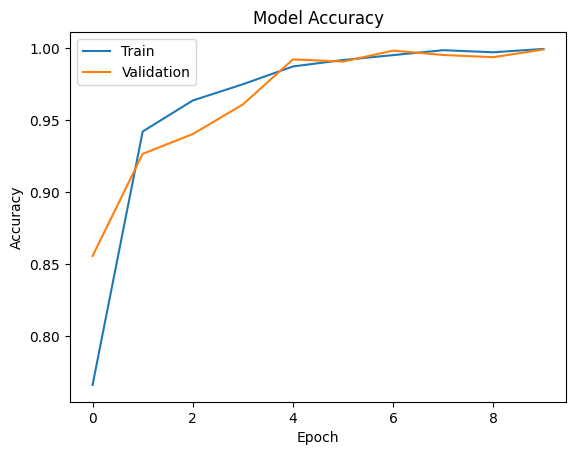

In [91]:
plt.plot(history3.history['accuracy'])

plt.plot(history3.history['val_accuracy'])

plt.title('Model Accuracy')

plt.ylabel('Accuracy')

plt.xlabel('Epoch')

plt.legend(['Train', 'Validation'], loc = 'upper left')

plt.show()

In [92]:
test_images, test_labels = next(test_set)
accuracy = model2.evaluate(test_images, test_labels, verbose = 1)
print('\n', 'Test_Accuracy:-', accuracy[1])

4/4 [==============================] - 1s 129ms/step - loss: 0.0157 - accuracy: 0.9922

 Test_Accuracy:- 0.9921875


4/4 [==============================] - 1s 136ms/step
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        48
           1       0.99      1.00      0.99        80

    accuracy                           0.99       128
   macro avg       0.99      0.99      0.99       128
weighted avg       0.99      0.99      0.99       128



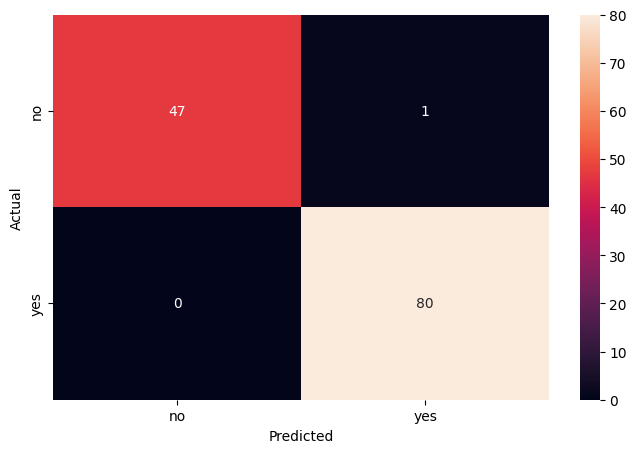

In [93]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

pred = model2.predict(test_images)
pred = np.argmax(pred, axis = 1)
y_true = np.argmax(test_labels, axis = 1)

print(classification_report(y_true, pred))

cm = confusion_matrix(y_true, pred)
plt.figure(figsize = (8, 5))
sns.heatmap(cm, annot = True, fmt = '.0f', xticklabels = ['no', 'yes'], yticklabels = ['no', 'yes'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()